**SMOTE**: **Synthetic Minority Oversampling Technique** is a machine learning technique that solves problems that occur when using an imbalanced data set. Imbalanced data sets often occur in practice, and it is crucial to master the tools needed to work with this type of data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from random import choice
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [ ]:
import io
df_full  = pd.read_csv(io.BytesIO(uploaded['adult.csv']))

In [ ]:
df_full.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
for col in df_full.columns:
    missing_val = df_full.loc[df_full[col]=='?',col].size
    if missing_val:
        print(col,'---MISSING VALUES---: ',missing_val )

workclass ---MISSING VALUES---:  1836
occupation ---MISSING VALUES---:  1843
native.country ---MISSING VALUES---:  583


In [ ]:
# drop the columns containing missing for simplicity. (Rows containing the missing values can also be dropped)

df_full = df_full.drop(columns=['workclass','occupation', 'native.country'])

In [ ]:
#Rearranging the columns containing numerical features followed by catergorical ones
num_cols = list(set(df_full.describe().columns))

categorical_cols = list(set(df_full.columns) - set(df_full.describe().columns))

df = df_full[num_cols + categorical_cols].copy()

df.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,education.num,education,race,sex,income,marital.status,relationship
0,90,77053,0,4356,40,9,HS-grad,White,Female,<=50K,Widowed,Not-in-family
1,82,132870,0,4356,18,9,HS-grad,White,Female,<=50K,Widowed,Not-in-family
2,66,186061,0,4356,40,10,Some-college,Black,Female,<=50K,Widowed,Unmarried
3,54,140359,0,3900,40,4,7th-8th,White,Female,<=50K,Divorced,Unmarried
4,41,264663,0,3900,40,10,Some-college,White,Female,<=50K,Separated,Own-child


**One hot encoding** is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [ ]:
df_array = df.to_numpy()

enc = OneHotEncoder(handle_unknown='ignore')     # one hot encoding the categorical features
one_hot_categorical = enc.fit_transform(df_array[:,len(num_cols):]).toarray()

**Synthetic Minority Over-sampling Technique for Nominal and Continuous.(SMOTE-NC)**

Unlike SMOTE, SMOTE-NC for dataset containing numerical and categorical features. However, it is not designed to work with only categorical features.

**STEP-1 : Median computation**

*   The median of standard deviations of all continuous features are computed.
*   If the nominal features differ between a sample and its potential nearest neighbors, then this median is included in the Euclidean distance computation.
*   Here the median of the standard deviations of continuous features is used to penalize the difference of nominal features by an amount that is related to the typical difference in continuous feature values.






In [ ]:
numerical_features = df_array[:,:len(num_cols)].astype(np.float64)
median_std = np.median(np.sqrt(numerical_features.var(axis= 0)))  # median of standard deviations
one_hot_categorical[one_hot_categorical>0] = median_std / 2  # The 1's in one-hot encoding are replaced  by median_std/2 
                                                            # to include the median directly in euclidean distance computation

In [ ]:
df_one_hot = np.append(numerical_features,one_hot_categorical,axis=1) # data frame containing numerical and 
                                                                      # one-hot encoded categorical features

**STEP-2 : Nearest neighbor computation**
- The Euclidean distance between the feature vector and k-nearest neighbors are to be calculated.
- For this purpose, We can use NearestNeighbors from sklearn.
- For every differing nominal feature between the considered feature vector and its potential nearest-neighbor, median of the standard deviations should be considered and they are already included for the Euclidean distance computation from previous step.

In [ ]:
neighbours = NearestNeighbors(n_neighbors = 5)   # setting the nearest k-neighbours (hyperparameter)
neighbours.fit(df_one_hot)

NearestNeighbors()

In [ ]:
NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

NearestNeighbors()

**STEP-3 : Populate the synthetic samples**
- The continuous features of the new synthetic samples are created using SMOTE technique.

- This technique works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

- The nominal features are given the value occuring in the majority of the k-nearest neighbors.

In [ ]:
%%time
syn_data = np.zeros_like(df_array)
for i in range(len(df_array)):
    nn = neighbours.kneighbors(df_one_hot[i].reshape(1, -1), return_distance=False)
    a = enc.inverse_transform(df_one_hot[nn[0]][:, len(num_cols):] / (median_std / 2).reshape(-1, 1)) # obtaining categorical values

    categorical_recon = [max(q, key=q.count) for q in zip(*a)]  # majority of k nearest neighbours

    nn_index = choice(nn[0]) # choose one of the k-nearest neighbours
    while nn_index == i:     # Since nn also includes df_one_hot[i] value, we don't want to select it
        nn_index = choice(nn[0])

    difference = (df_one_hot[nn_index] - df_one_hot[i])[:len(num_cols)]
    gap = np.random.random()
    numerical_recon = (df_one_hot[i][:len(num_cols)] + (gap * difference)).astype('int64')

    syn_data[i] = np.append(numerical_recon, categorical_recon)

CPU times: user 3min 46s, sys: 2min 23s, total: 6min 9s
Wall time: 3min 33s


In [ ]:
# Obtain the synthetic data and store in data frame

df_recon = pd.DataFrame(data=syn_data, columns=df.columns).astype({'hours.per.week': 'int64',
                                                                         'age': 'int64',
                                                                         'fnlwgt': 'int64',
                                                                         'capital.gain': 'int64',
                                                                         'capital.loss': 'int64',
                                                                         'education.num': 'int64',
                                                                         })

In [ ]:
df.head() #original dataset


,age,fnlwgt,capital.gain,capital.loss,hours.per.week,education.num,education,race,sex,income,marital.status,relationship
0,90,77053,0,4356,40,9,HS-grad,White,Female,<=50K,Widowed,Not-in-family
1,82,132870,0,4356,18,9,HS-grad,White,Female,<=50K,Widowed,Not-in-family
2,66,186061,0,4356,40,10,Some-college,Black,Female,<=50K,Widowed,Unmarried
3,54,140359,0,3900,40,4,7th-8th,White,Female,<=50K,Divorced,Unmarried
4,41,264663,0,3900,40,10,Some-college,White,Female,<=50K,Separated,Own-child


In [ ]:
# For reconstructed data

df_recon.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,education.num,education,race,sex,income,marital.status,relationship
0,85,77050,0,4250,40,8,HS-grad,White,Female,<=50K,Married-civ-spouse,Not-in-family
1,51,132876,0,2666,33,9,HS-grad,White,Male,>50K,Married-civ-spouse,Husband
2,57,185915,0,2741,40,12,Some-college,White,Male,>50K,Married-civ-spouse,Husband
3,56,140405,0,2558,40,12,7th-8th,White,Male,<=50K,Divorced,Not-in-family
4,23,264442,0,2363,40,10,Some-college,White,Male,>50K,Married-civ-spouse,Husband


In [ ]:
def plot_figure(df):
    plt.figure(figsize=(15,30))

    for i in range(len(df.columns)):
        plt.subplot(6,2,i+1)
        if df[df.columns[i]].dtype == 'object': # categorical data
            df[df.columns[i]].value_counts().plot(kind='bar', legend=True, fontsize=14)
            plt.legend(fontsize=20)

        else:  # continuous data plotted in green
            df[df.columns[i]].plot(kind='hist',color='green', legend=True, fontsize=14)
            plt.legend(fontsize=20)

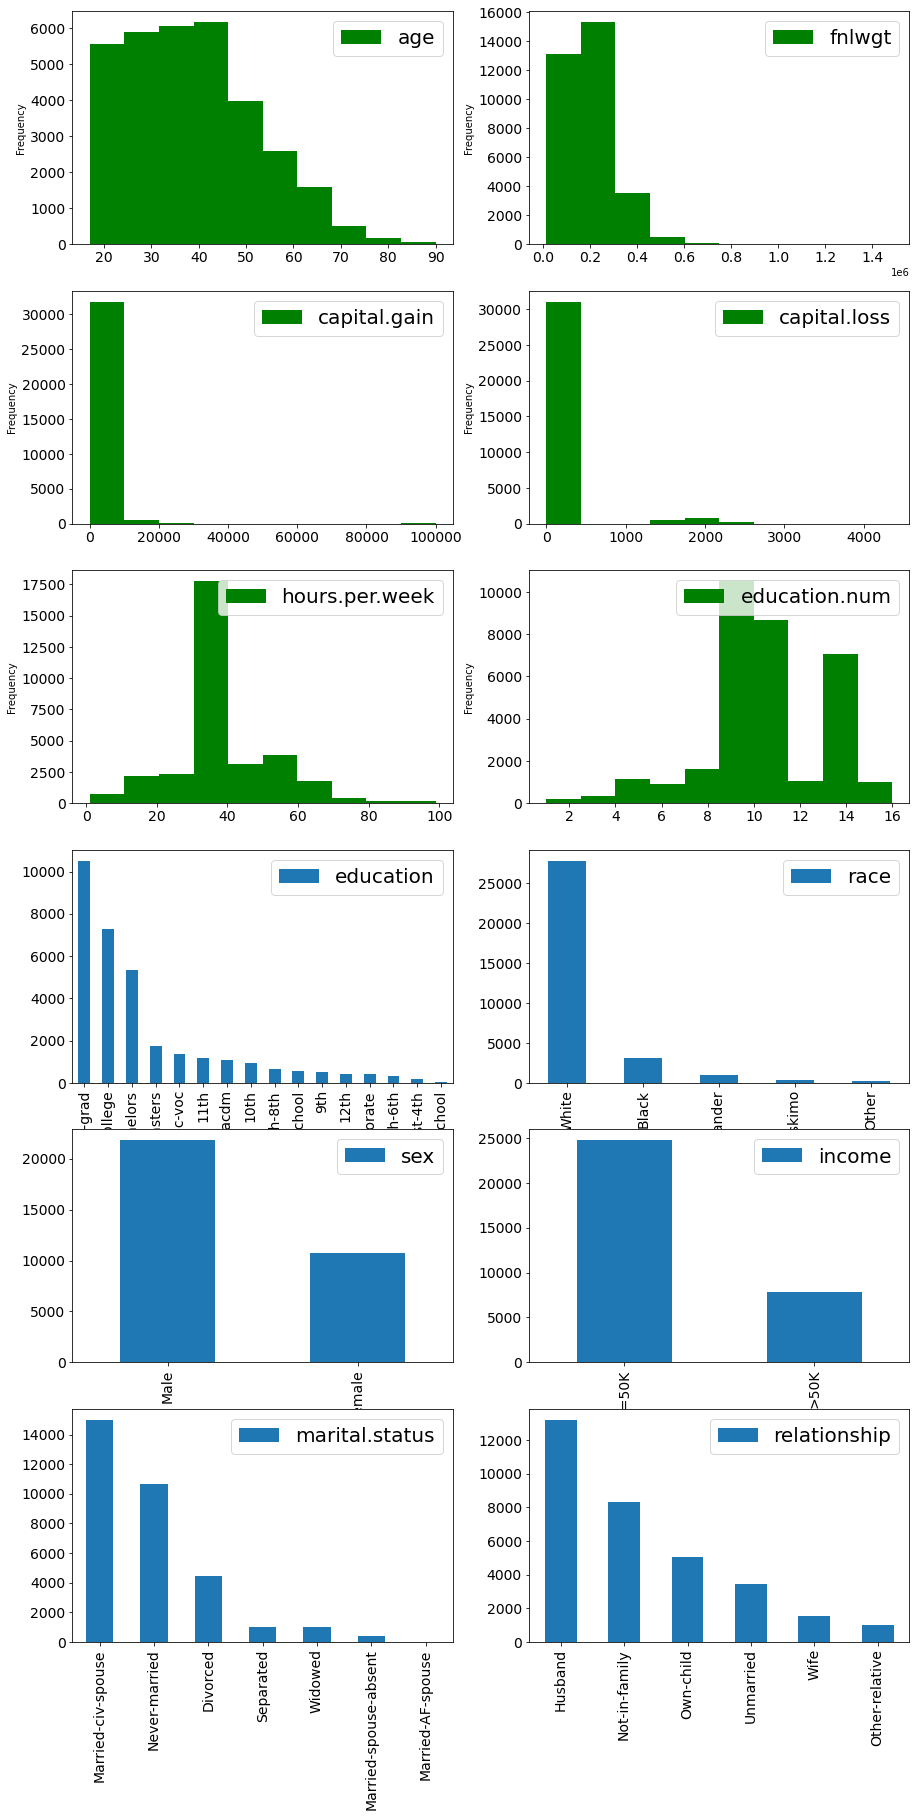

In [ ]:
# For original dataset

plot_figure(df)

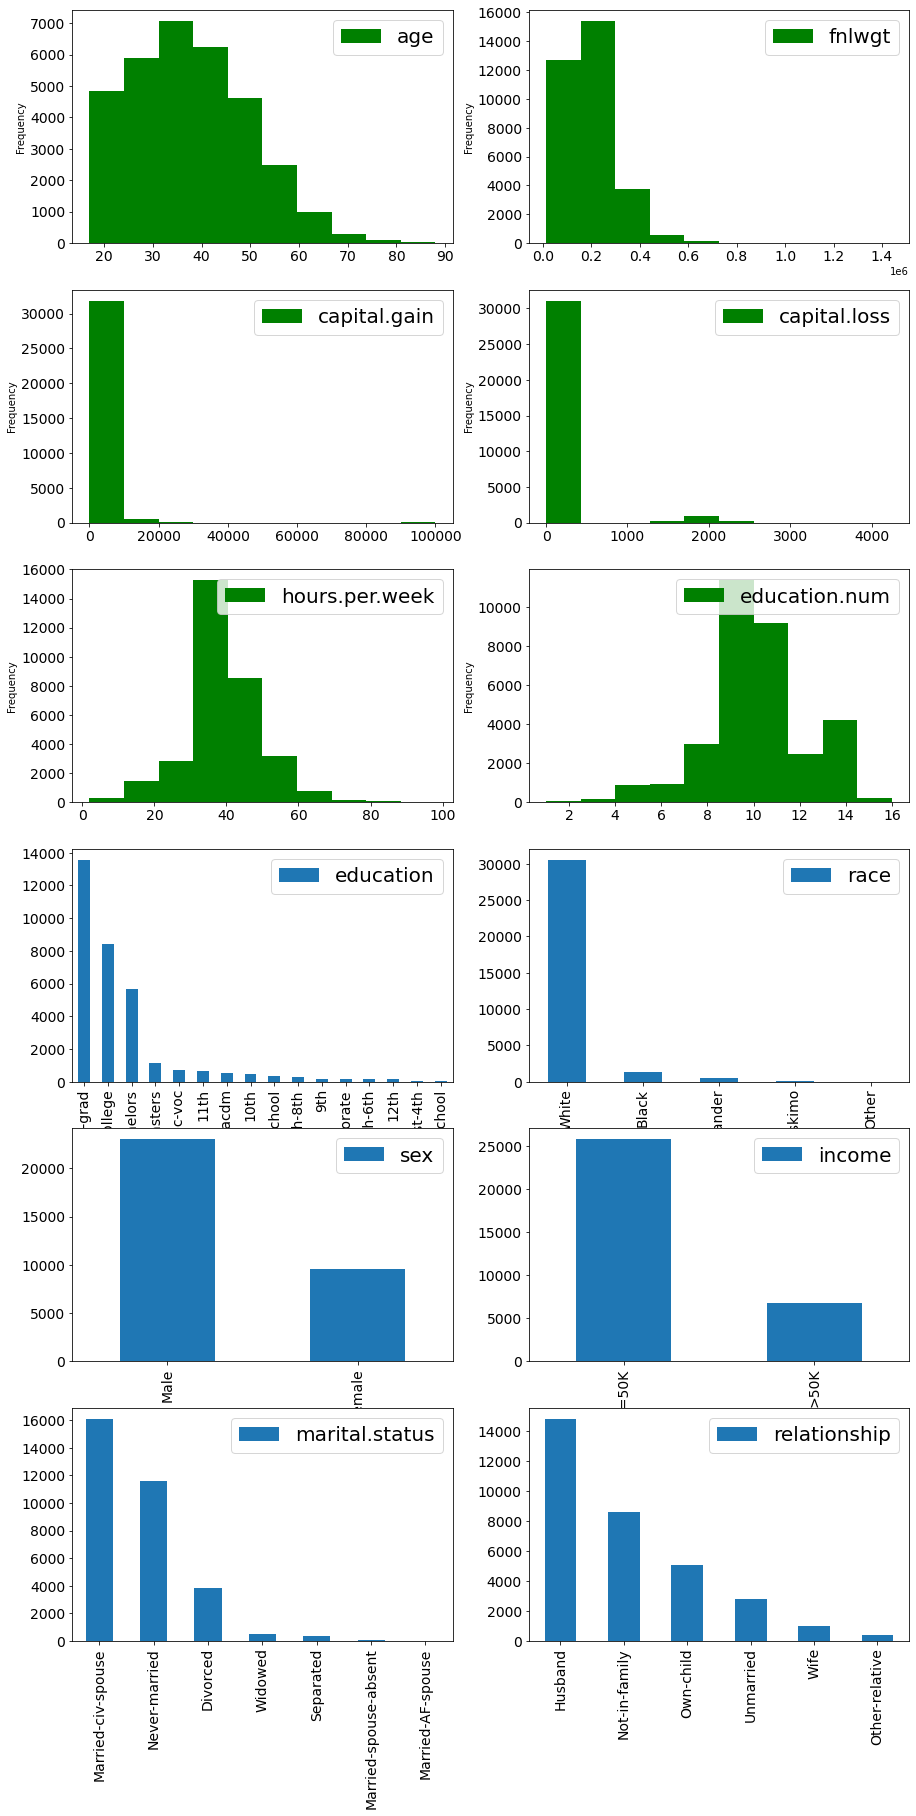

In [ ]:
# For reconstructed data
plot_figure(df_recon)

In [ ]:
# For original dataset
df.corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,education.num
age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.036527
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.043195
capital.gain,0.077674,0.000432,1.000000,-0.031615,0.078409,0.122630
capital.loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,0.079923
hours.per.week,0.068756,-0.018768,0.078409,0.054256,1.000000,0.148123
education.num,0.036527,-0.043195,0.122630,0.079923,0.148123,1.000000


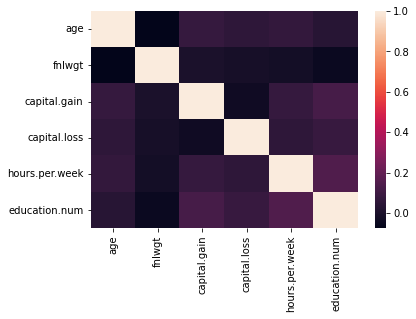

In [ ]:
# For original dataset
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns)

In [ ]:
# For reconstructed data
df_recon.corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,education.num
age,1.000000,-0.085024,0.091027,0.068064,0.123448,0.053259
fnlwgt,-0.085024,1.000000,-0.002005,-0.016350,-0.034671,-0.057736
capital.gain,0.091027,-0.002005,1.000000,-0.031276,0.094450,0.133439
capital.loss,0.068064,-0.016350,-0.031276,1.000000,0.071908,0.081660
hours.per.week,0.123448,-0.034671,0.094450,0.071908,1.000000,0.157089
education.num,0.053259,-0.057736,0.133439,0.081660,0.157089,1.000000


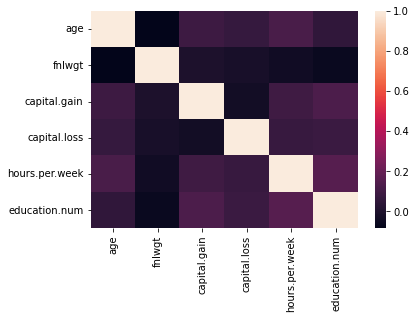

In [ ]:
# For reconstructed data
sns.heatmap(df_recon.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns)